# Tasks

## Data Import and Cleaning
- **Import the dataset** using Pandas.
- **Clean and preprocess the data**, addressing missing values and categorizing data as needed.
- Convert **dates** and other relevant fields to appropriate formats.

---

## Exploratory Data Analysis
- Use Pandas to explore basic statistics such as:
  - Number of crashes
  - Fatalities
  - Survival rates
- Analyze the **frequency of crashes over time** to identify trends.

---

## Statistical Analysis
- Use SciPy to analyze:
  - Distribution of fatalities and survival rates.
  - Key statistics: **mean**, **median**, and **standard deviation**.
- Conduct a **hypothesis test**, e.g., comparing:
  - The average number of fatalities across different decades or regions.

---

## Visualization
- Create visualizations using Matplotlib and Seaborn:
  - Time series plots of crashes over years.
  - Bar charts of crashes by region.
  - Histograms of fatalities.

---

## Insight and Report
- Summarize findings and provide insights into patterns or anomalies discovered in the data.
- Prepare a **well-structured report** including:
  - Code
  - Visualizations
  - Interpretations

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import skew, kurtosis
from scipy.stats import ttest_ind, ttest_rel

df = pd.read_csv('/Users/teitelbaumsair/Desktop/DI_Bootcamp/W6/D3/DAILY CHALLENGE/Airplane_Crashes_and_Fatalities.csv')
df

,Date,Time,Location,Operator,Flight #,Route,AC Type,Registration,cn/ln,Aboard,Aboard Passangers,Aboard Crew,Fatalities,Fatalities Passangers,Fatalities Crew,Ground,Summary
0,9/17/1908,17:18,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,1.0,1.0,1.0,0.0,0.0,"During a demonstration flight, a U.S. Army fly..."
1,09/07/1909,NaN,"Juvisy-sur-Orge, France",NaN,NaN,Air show,Wright Byplane,SC1,NaN,1.0,0.0,1.0,1.0,0.0,0.0,0.0,Eugene Lefebvre was the first pilot to ever be...
2,07/12/1912,06:30,"Atlantic City, New Jersey",Military - U.S. Navy,NaN,Test flight,Dirigible,NaN,NaN,5.0,0.0,5.0,5.0,0.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...
3,08/06/1913,NaN,"Victoria, British Columbia, Canada",Private,NaN,NaN,Curtiss seaplane,NaN,NaN,1.0,0.0,1.0,1.0,0.0,1.0,0.0,The first fatal airplane accident in Canada oc...
4,09/09/1913,18:30,Over the North Sea,Military - German Navy,NaN,NaN,Zeppelin L-1 (airship),NaN,NaN,20.0,NaN,NaN,14.0,NaN,NaN,0.0,The airship flew into a thunderstorm and encou...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4993,11/21/2022,10:15,"MedellÌn, Colombia",AeroPaca SAS,NaN,MedellÌn - Pizarro,Piper PA-31-350 Navajo Chieftain,HK-5121,31-7652004,8.0,6.0,2.0,8.0,6.0,2.0,0.0,The plane was chartered to carry a team of six...
4994,1/15/2023,10:50,"Pokhara, Nepal",Yeti Airlines,YT691,Kathmandu - Pokhara,ATR 72-500-72-212-A,9NANC,754,72.0,68.0,4.0,72.0,68.0,4.0,0.0,"Before approach, the pilot requested a change ..."
4995,9/16/2023,NaN,"Barcelos, Brazil",Manaus Aerotaxi,NaN,NaN,Embraer EMB-110P1 Bandeirante,PT-SOG,110490,14.0,12.0,2.0,14.0,12.0,2.0,0.0,The air taxi crashed in heavy rain while attem...
4996,10/29/2023,06:30,"Rio Branco, Brazil",ART Taxi Aero,NaN,Rio Branco - Envira,Cessna 208B Grand Caravan,PT-MEE,208B0344,12.0,10.0,2.0,12.0,10.0,2.0,0.0,The air taxi crashed into a heavy wooded area ...


In [39]:
total_rows = df.shape[0]
print("Total number of Crashes:", total_rows)
#Total crashes before cleaning data.

Total number of Crashes: 4957


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4998 entries, 0 to 4997
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Date                   4998 non-null   object 
 1   Time                   3486 non-null   object 
 2   Location               4994 non-null   object 
 3   Operator               4988 non-null   object 
 4   Flight #               1329 non-null   object 
 5   Route                  4221 non-null   object 
 6   AC Type                4983 non-null   object 
 7   Registration           4724 non-null   object 
 8   cn/ln                  4330 non-null   object 
 9   Aboard                 4980 non-null   float64
 10  Aboard Passangers      4769 non-null   float64
 11  Aboard Crew            4772 non-null   float64
 12  Fatalities             4990 non-null   float64
 13  Fatalities Passangers  4756 non-null   float64
 14  Fatalities Crew        4757 non-null   float64
 15  Grou

In [25]:
df.isna().sum() # to check null values

Date                        0
Time                     1512
Location                    4
Operator                   10
Flight #                 3669
Route                     777
AC Type                    15
Registration              274
cn/ln                     668
Aboard                     18
Aboard Passangers         229
Aboard Crew               226
Fatalities                  8
Fatalities Passangers     242
Fatalities Crew           241
Ground                     42
Summary                    64
dtype: int64

In [31]:
#drop rows where operator is null
df.dropna(subset=['Operator'], axis=0, inplace=True)
df.dropna(subset=['AC Type'], axis=0, inplace=True)
df.dropna(subset=['Fatalities'], axis=0, inplace=True)
df.dropna(subset=['Aboard'], axis=0, inplace=True)
df.dropna(subset=['Location'], axis=0, inplace=True)


df.drop(['Flight #'], axis=1, inplace=True)
df.drop(['cn/ln'], axis=1, inplace=True)
df.drop(['Route'], axis=1, inplace=True)
df.drop(['Registration'], axis=1, inplace=True)
df.drop(['Time'], axis=1, inplace=True)
df.drop(['Ground'], axis=1, inplace=True)




Before doing a fill na with the mean, plot a box plot or histagram to show the kewness of the data. Then decide which characeristic to impute with. 

In [36]:
import warnings
warnings.filterwarnings('ignore')

df['Aboard Passangers'].fillna(df['Aboard Passangers'].mean(), inplace=True)
df['Aboard Crew'].fillna(df['Aboard Crew'].mean(), inplace=True)
df['Fatalities'].fillna(df['Fatalities'].mean(), inplace=True)
df['Fatalities Crew'].fillna(df['Fatalities Crew'].mean(), inplace=True)
df['Fatalities Passangers'].fillna(df['Fatalities Passangers'].mean(), inplace=True)


In [38]:
df.isnull().sum() #to check null values

Date                      0
Location                  0
Operator                  0
AC Type                   0
Aboard                    0
Aboard Passangers         0
Aboard Crew               0
Fatalities                0
Fatalities Passangers     0
Fatalities Crew           0
Summary                  53
Flight Type               0
dtype: int64

In [37]:
# Function to classify flight type
def classify_flight_type(operator):
    if any(military_term in operator for military_term in ['Military', 'Air Force', 'Navy', 'Army']):
        return 'Military'
    elif any(commercial_term in operator for commercial_term in ['Airlines', 'Air Service', 'Transport']):
        return 'Commercial'
    else:
        return 'Cargo'

# Apply the function to the 'Operator' column and create a new 'Flight Type' column
df['Flight Type'] = df['Operator'].apply(classify_flight_type)

print(df)

            Date                            Location  \
0      9/17/1908                 Fort Myer, Virginia   
2     07/12/1912           Atlantic City, New Jersey   
3     08/06/1913  Victoria, British Columbia, Canada   
4     09/09/1913                  Over the North Sea   
5     10/17/1913          Near Johannisthal, Germany   
...          ...                                 ...   
4993  11/21/2022                  MedellÌn, Colombia   
4994   1/15/2023                      Pokhara, Nepal   
4995   9/16/2023                    Barcelos, Brazil   
4996  10/29/2023                  Rio Branco, Brazil   
4997  11/01/2023                    Morelos,  Mexico   

                      Operator                           AC Type  Aboard  \
0         Military - U.S. Army                  Wright Flyer III     2.0   
2         Military - U.S. Navy                         Dirigible     5.0   
3                      Private                  Curtiss seaplane     1.0   
4       Military - Germ


- Use Pandas to explore basic statistics such as:
  - Number of crashes
  - Fatalities
  - Survival rates
- Analyze the **frequency of crashes over time** to identify trends.

In [41]:
import pandas as pd
import numpy as np

total_rows = df.shape[0]
print("Total number of Crashes:", total_rows)

Total number of Crashes: 4957


In [55]:
df["Aboard"].sum()

np.float64(155109.0)

In [44]:
df["Fatalities"].sum()

np.float64(111327.0)

In [52]:
#survival rate
df['Survival Rate'] = 1 - (df['Fatalities'] / df['Aboard'])
df['Survival Rate'] = df['Survival Rate'].round(2)
df['Survival Rate'].mean() * 100


np.float64(18.187600969305333)

It could also have been a good feature to add destructiveness of the flight column. So once you have the percentage survival rate, you can say what the individual percentage of each crash and the severity of the crash.

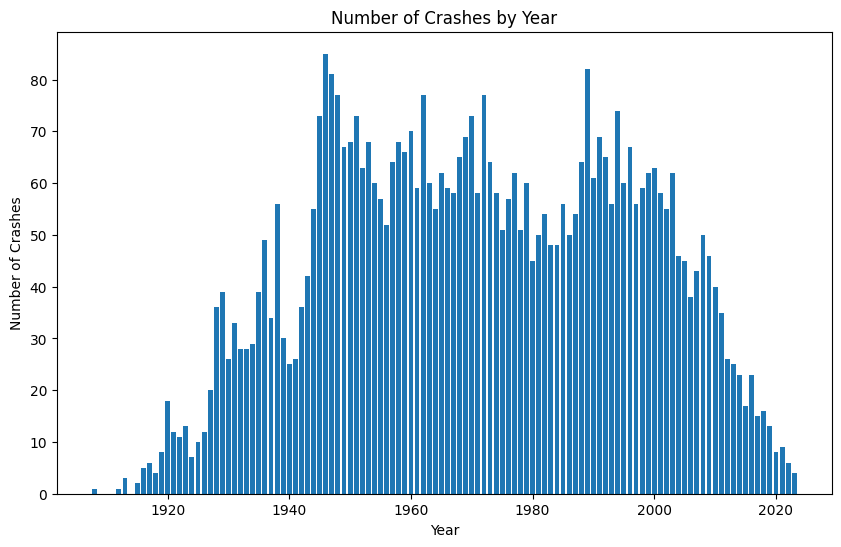

In [54]:
#frequency of crashes
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df['Year'] = pd.to_datetime(df['Date']).dt.year

# Group the data by year and count the number of crashes
crashes_by_year = df.groupby('Year').size()
plt.figure(figsize=(10, 6))
# Plot the data
plt.bar(crashes_by_year.index, crashes_by_year.values)
plt.xlabel('Year')
plt.ylabel('Number of Crashes')
plt.title('Number of Crashes by Year')
plt.show()

- Use SciPy to analyze:
  - Distribution of fatalities and survival rates.
  - Key statistics: **mean**, **median**, and **standard deviation**.
- Conduct a **hypothesis test**, e.g., comparing:
  - The average number of fatalities across different decades or regions.

- Create visualizations using Matplotlib and Seaborn:
  - Time series plots of crashes over years.
  - Bar charts of crashes by region.
  - Histograms of fatalities.


- Summarize findings and provide insights into patterns or anomalies discovered in the data.
- Prepare a **well-structured report** including:
  - Code
  - Visualizations
  - Interpretations